In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tifffile import imread
from tifffile import imsave
from skimage.util import img_as_float
from skimage.color import gray2rgb

In [2]:
debris = {}
debris['840001_0152'] = (11650, 12350, 13000, 13700)  # (row_min, row_max, col_min, col_max)
debris['840005_0115'] = (14500, 15700, 16600, 17800)
debris['840003_0039'] = (8050, 9150, 1700, 2800)
debris['840004_0040'] = (12750, 13675, 4675, 5600)
debris['840004_0089'] = (2600, 3600, 17000, 18000)
debris['840005_0081'] = (6300, 7000, 18700, 19400)
debris['840005_0127'] = (3200, 4500, 9800, 11100)
debris['840063_0110'] = (12450, 13550, 20750, 21850)
debris['840069_0053'] = (4419, 4995, 24, 600)
debris['840153_0128'] = (20550, 21250, 27100, 27800)
debris['840091_0091'] = (4700, 6200, 13650, 15150)
debris['840096_0083'] = (17700, 19200, 4400, 5900)

In [3]:
# output dir
save_dir = '/Users/greg/Dropbox (HMS)/Baker_QC_2021/script_output/debris_artifacts_sup'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

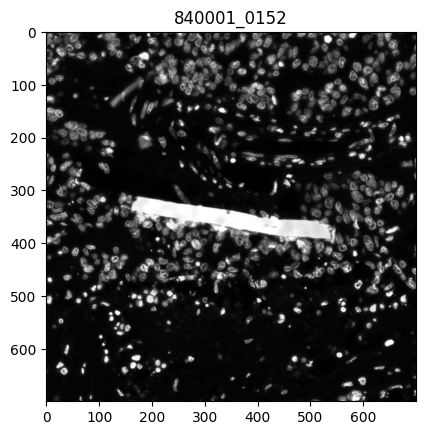

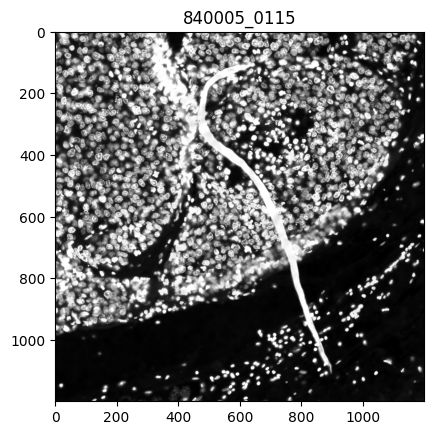

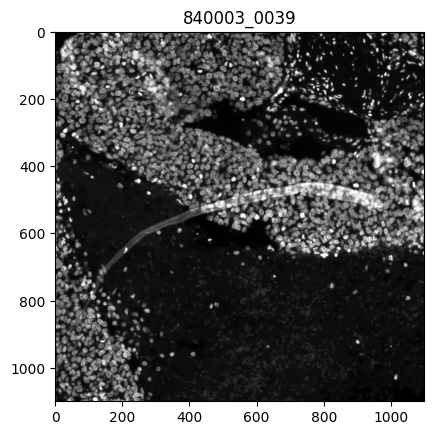

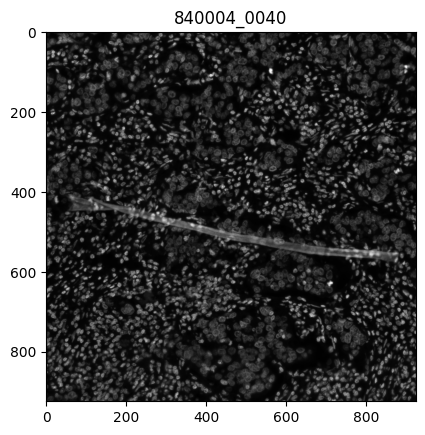

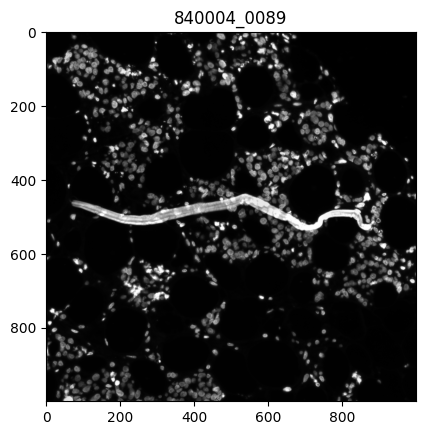

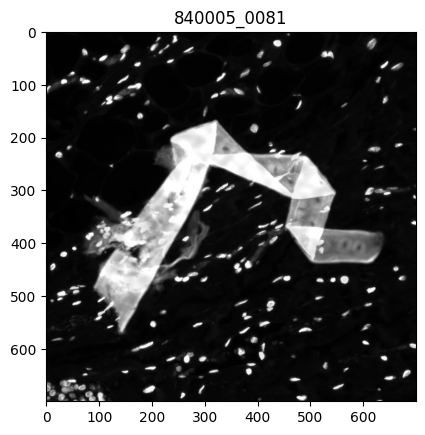

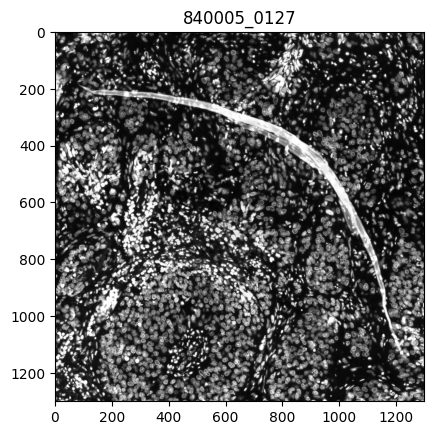

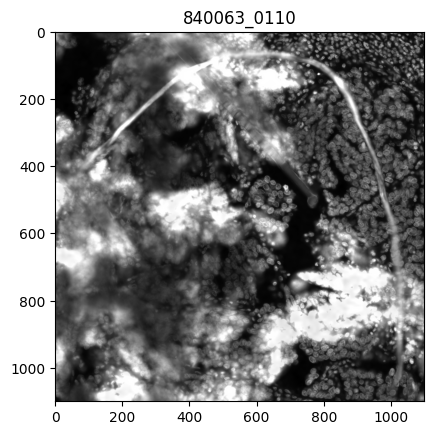

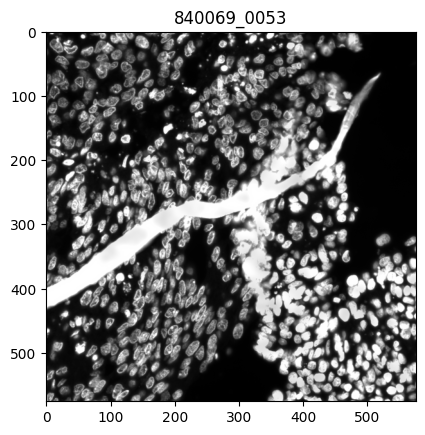

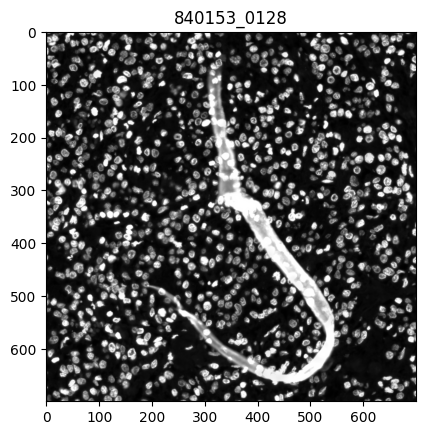

In [ ]:
for k, v, in debris.items():
    
    # assign file path to TOPACIO OME-TIFF (THIS IMAGE IS NOT BACKGROUND SUBTRACTED)
    img_path = (f'/Volumes/T7 Shield/cylinter_input/TOPACIO_FINAL/tif/{k}.ome.tif')
    
    dna = imread(img_path, key=0)
    dna = img_as_float(dna)
    dna_crop = dna[v[0]:v[1], v[2]:v[3]]
    dna_crop = (dna_crop - np.min(dna_crop)) / (np.max(dna_crop) - np.min(dna_crop))  # normalize 0-1
    
    bottom_cutoff = 0.0
    top_cutoff = 1.0
    dna_crop = np.clip(dna_crop, bottom_cutoff, top_cutoff)
    dna_crop = (dna_crop - np.min(dna_crop)) / (np.max(dna_crop) - np.min(dna_crop))  # normalize 0-1

    dna_crop_rgb = gray2rgb(dna_crop)
    
    plt.imshow(dna_crop_rgb, cmap='magma')
    plt.title(k)
    plt.savefig(os.path.join(save_dir, f'{k}.png'), dpi=1000)
    plt.show()
    plt.close('all')